# Capital Asset Pricing Model (CAPM)


## Assumptions
- In the mean-variance analysis, we have known that

<center>

**Total risk = unsystematic risk + [systematic risk](https://en.wikipedia.org/wiki/Systematic_risk).**

</center>

- We also have seen that the unsystematic (firm-specific) risk can be removed by **diversification** but the systematic risk cannot be eliminated alike (for example, WWI/WWII, 911 Attacks, Financial crisis of 2007–2008, COVID-19 Pandemic).
- Now we assume that 
    1. all investors are risk-averse (so that the portfolio are determined by the mean-variance analysis), and
    2. they all have the identical expectation to the market assets, as known as the homogeneous expectation assumption.
- When the market reaches its **equilibrium**, **the optimal risky portfolio** (the tangent point on the efficient frontier) becomes **the market portfolio** with the return rate of the market, denoted by $$R_M = \sum_{i = 1}^n \omega_i^* R_i \text{ with } \omega_i^* = \frac{V_i}{\sum_{i = 1}^n V_i}.$$ 
    - The market portfolio is also called the **value-weighted** portfolio.
- This is called **the capital asset pricing model (CAPM)**, indepedently proposed by Treynor (1961), Sharpe (1964), Lintner (1965), and Mossin (1966) with the following extra assumptions:
    3. No limitation on borrowing or lending the money with the risk-free rate.
    4. Perfect capital market: no friction, perfectly competitive market (all investors are price takers), no asymmetric information.

- In particular, the CAL becomes **the capital market line (CML)** with its slope $$\frac{\mathbf{E}(R_M) - R_f}{\sigma_M},$$ which is also called **the market price of risk**.
- Sharpe and Markowitz share 1990 Nobel Memorial Prize in Economic Sciences.
- References:
    - Fama and French (2004): [The Capital Asset Pricing Model:
Theory and Evidence](https://pubs.aeaweb.org/doi/pdfplus/10.1257/0895330042162430)

## Model Description

<center>

<img src = "https://cdn-images-1.medium.com/max/800/1*jh7T0OZTOjXKciaUALG3gA.png" width="300"/>

</center>

- Let $R_{i}$ be the random variable representing the return rate of asset $i$.
- The CAPM states that the expected return of stock $i$ can be $$\mathbf{E}[R_{i}] - R_f = \beta_i (\mathbf{E}[R_M] - R_f),$$ where $$\beta_i = \rho_{iM} \dfrac{\sigma_i}{\sigma_M} = \dfrac{\sigma_{iM}}{\sigma_M^2}$$ is the slope (sensitivity) of the expected excess returns of asset $i$ to the expected excess market returns.
    - This is so-called the **security market line (SML)** for stock $i$.
    - Note that the market portfolio can be proxied by the market index, say the S&P 500 Index. (Why not Dow Jones Industrial Average?)

## Explanations

<center>

<img src = "https://www.csie.ntu.edu.tw/~d00922011/python/data/markowitz-capm.jpg" width="600"/>

</center>

- How to explain $\beta_i$?
    - If $\beta_i = 1$, the risk of the asset/portfolio is **equal** to the market portfolio; stock $i$ is called the **neutral** security.
    - If $\beta_i > 1$, the risk of the asset/portfolio is **higher** than the market portfolio; stock $i$ is called the **aggressive** security.
    - If $\beta_i < 1$, the risk of the asset/portfolio is **lower**  than the market portfolio; stock $i$ is called the **defensive** security.
    - If $\beta_i = 0$, then stock $i$ has no systematic risk so that the holder earns only the risk-free rate.
        - Note that the assets without systematic risk are not riskless but may bear firm-specific risk.
    - If $\beta_i < 0$, then stock $i$ moves against the market portfolio; this means the investor holds stock $i$ to **hedge** the market portfolio!
- Assume that $R_f = 0$% and $R_M = 10$%.
    - If $\beta_X = 2$, then $R_X = 20$%.
    - If $\beta_Y = 0.5$, then $R_Y = 5$%.
- Note that all possible portfolios should be on the SML! (Why?)

## Example 1: Facebook (FB)

In [ ]:
%%capture

!pip install --upgrade pandas-datareader
!pip install ffn

In [ ]:
import ffn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm

%matplotlib inline

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


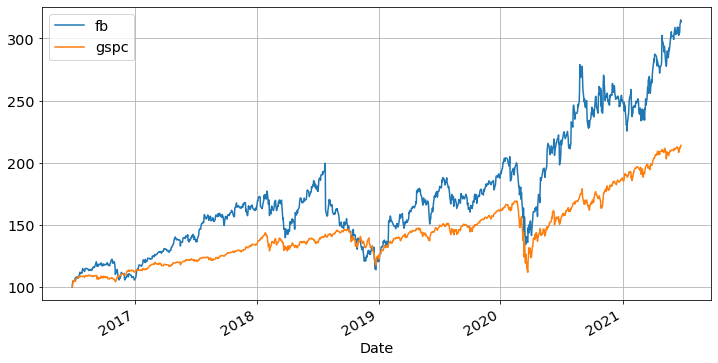

In [ ]:
tbl = ffn.get("fb, ^GSPC", start = date.today() - relativedelta(years = 5))
tbl.rebase().plot(grid = True)

In [ ]:
def monthly_return_rate_calculator(array_like):
    return array_like[-1] / array_like[0] - 1
    
monthly_return_rates = tbl.resample("M").apply(monthly_return_rate_calculator).dropna()
monthly_return_rates

,fb,gspc
Date,,
2016-06-30,0.048729,0.049147
2016-07-31,0.085384,0.033596
2016-08-31,0.014560,0.000051
2016-09-30,0.016644,-0.001193
2016-10-31,0.017240,-0.016218
...,...,...
2021-02-28,-0.016755,0.009881
2021-03-31,0.111812,0.018215
2021-04-30,0.088462,0.040126


In [ ]:
rf = (1.01 ** (1 / 12) - 1)
y = monthly_return_rates['fb'] - rf
x = monthly_return_rates['gspc'] - rf

X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     fb   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     59.16
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.82e-10
Time:                        21:43:42   Log-Likelihood:                 86.137
No. Observations:                  61   AIC:                            -168.3
Df Residuals:                      59   BIC:                            -164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.008      0.729      0.4

- See https://finance.yahoo.com/quote/FB/key-statistics?p=FB.

## Example 2: TSMC (2330.tw)

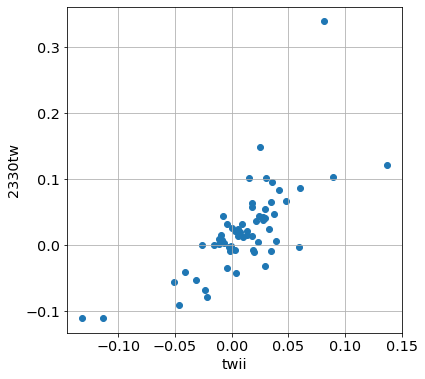

In [ ]:
tbl = ffn.get("2330.tw, ^twii", start = date.today() - relativedelta(years = 5))
monthly_return_rates = tbl.resample("M").apply(monthly_return_rate_calculator).dropna()
x = monthly_return_rates['twii'] - rf
y = monthly_return_rates['2330tw'] - rf

plt.figure(figsize = (6, 6))
plt.scatter(x, y)
plt.xlabel("twii")
plt.ylabel("2330tw")
plt.grid(True)

In [ ]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 2330tw   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     67.04
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           2.64e-11
Time:                        21:43:44   Log-Likelihood:                 101.56
No. Observations:                  61   AIC:                            -199.1
Df Residuals:                      59   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.006      1.446      0.1

- See https://finance.yahoo.com/quote/2330.TW/key-statistics?p=2330.TW.

## Example 3: 台灣50反1 (00632R)

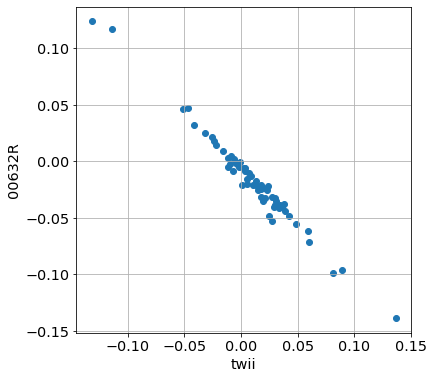

In [ ]:
tbl = ffn.get("00632R.tw, ^twii", start = date.today() - relativedelta(years = 5))
monthly_return_rates = tbl.resample("M").apply(monthly_return_rate_calculator).dropna()
x = monthly_return_rates['twii'] - rf
y = monthly_return_rates['00632rtw'] - rf

plt.figure(figsize = (6, 6))
plt.scatter(x, y)
plt.xlabel("twii")
plt.ylabel("00632R")
plt.grid(True)

In [ ]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               00632rtw   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3050.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.69e-52
Time:                        21:43:45   Log-Likelihood:                 229.57
No. Observations:                  61   AIC:                            -455.1
Df Residuals:                      59   BIC:                            -450.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.001     -9.643      0.0

- See https://finance.yahoo.com/quote/00632R.TW?p=00632R.TW.

## Example 4: TW50
- https://www.ftserussell.com/products/indices/twse-taiwan

In [ ]:
%%capture

!wget https://www.csie.ntu.edu.tw/~d00922011/python/data/tw50.csv

In [ ]:
tbl = pd.read_csv("tw50.csv")
ticks = tbl["股票代號"].apply(lambda x : str(x) + ".tw")

returns = []
alphas = []
alpha_pvalues = []
betas = []
rsquares = []
for item in ticks:
    tbl = ffn.get("{}, ^twii".format(item), start = date.today() - relativedelta(years = 1))
    monthly_return_rates = tbl.resample("M").apply(monthly_return_rate_calculator).dropna()
    x = monthly_return_rates['twii'] - rf 
    y = monthly_return_rates[item.replace(".", "")] - rf
    returns.append((np.mean(y) + rf) * 100)
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
    alphas.append(results.params[0] * 100)
    alpha_pvalues.append(results.pvalues[0])
    betas.append(results.params[1])
    rsquares.append(results.rsquared)

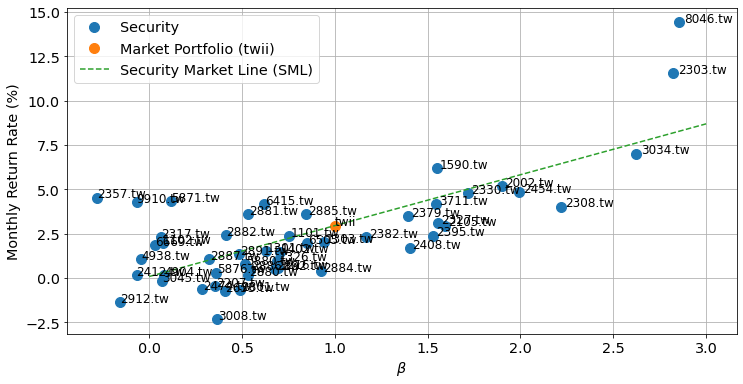

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(betas, returns, "o", ms = 10)
for i in range(len(ticks)):
    plt.text(betas[i] * 1.01, returns[i], ticks[i], fontsize = 12)

rm = (np.mean(x) + rf) * 100
plt.plot(1, rm, "o", ms = 10)
plt.text(1, rm, "twii", fontsize = 12)

x_range = np.linspace(0, round(max(betas)), 100)
y_range = (rm - rf * 100) * x_range + rf * 100
plt.plot(x_range, y_range, "--")
plt.legend(["Security", "Market Portfolio (twii)", "Security Market Line (SML)"])
plt.xlabel("$\\beta$")
plt.ylabel("Monthly Return Rate (%)")
plt.grid(True)

### Overpriced or Underpriced Assets?
- If stock $i$ is located **below** the SML, then stock $i$ is **overpriced**.
    - So the price of stock $i$ will **decrease** until the expected risk premium moves back to the SML eventually.
- If stock $i$ is located **above** the SML, then stock $i$ is **underpriced**.
    - So the price of stock $i$ will **increase** until the expected risk premium moves back to the SML eventually.

### Jensen's $\alpha$: Anomaly Returns 
- We define the (excess return) market model $${E}[R_{i}] - R_f = \alpha_i + \beta_i (\mathbf{E}[R_M] - R_f).$$
- In the CAPM, $\alpha_i$ should be zero (or insignificantly nonzero) when stock $i$ reaches its equilibrium.
- If not, then it is called an anomaly to the CAPM.
    - In other words, the CAPM cannot explain the excess return rate.

In [ ]:
print([x for x in alpha_pvalues if x < 0.025])

[]


Text(-2, 10, 'Overpriced Assets')

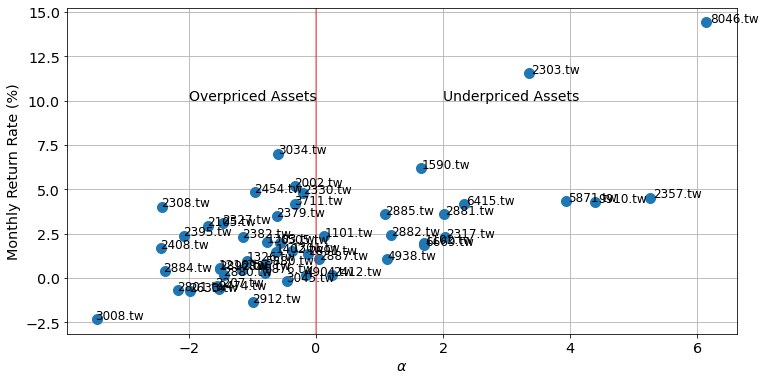

In [ ]:
plt.figure(figsize = (12, 6))

plt.plot(alphas, returns, "o", ms = 10)
for i in range(len(ticks)):
    plt.text(alphas[i] * 1.01, returns[i], ticks[i], fontsize = 12)

plt.xlabel("$\\alpha$")
plt.ylabel("Monthly Return Rate (%)")
plt.grid(True)

plt.axvline(x = 0, alpha = 0.5, color = "r")
plt.text(2, 10, "Underpriced Assets", fontsize = 14)
plt.text(-2, 10, "Overpriced Assets", fontsize = 14)

### The Determination of Coefficient $R^2$: The Ratio of Market Risk over Total Risk

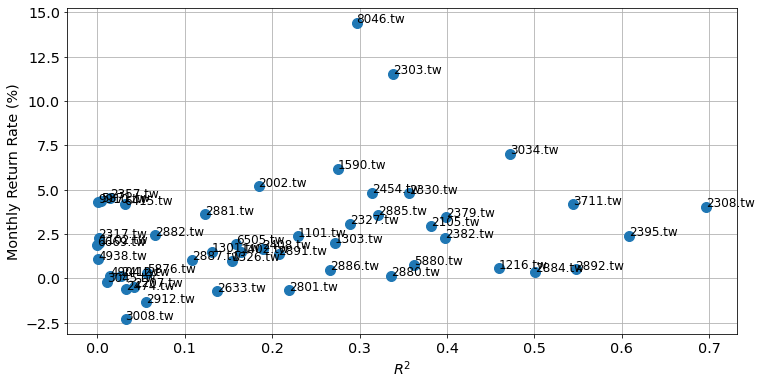

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(rsquares, returns, "o", ms = 10)
for i in range(len(ticks)):
    plt.text(rsquares[i], returns[i], ticks[i], fontsize = 12)

plt.xlabel("$R^2$")
plt.ylabel("Monthly Return Rate (%)")
plt.grid(True)

## Example 5: Dividend Discount Model (DDM)
- The stock price $P_0$ can be determined by $$P_0 = \sum_{t = 1}^{\infty}\dfrac{\text{Div}_t}{(1 + k_E) ^ t},$$
where $\text{Div}_t$ is the common stock dividend per share at time $t$ and $k_E$ is **the required rate of return**.
- In practice, the required rate of return can be regarded as **the opportunity cost of capital** so that $k_E$ can be determined by the CAPM: $$k_E = \mathbf{E}(R_E) = R_f + \beta_E (\mathbf{E}(R_M) - R_f), $$ where $\beta_E$ is called the share holder's beta.
- $k_E$ is also called the capitalization rate.
- Note that $P_0$ which excludes $\text{Div}_0$ is **the ex-dividend stock price**.
- You may consider **the Gordon Model** (the Constant-Growth Rate DDM).

## Example 6: Performance Evaluation in Active Management

- **Active management** (also called active investing) refers to a portfolio management strategy where the manager makes specific investments with the goal of outperforming an investment benchmark index or target return.
    - For example, [Berkshire Hathaway Inc.](https://berkshirehathaway.com/), [Medallion Fund](https://medallionfunds.com/), [Bridgewater Associates](https://www.bridgewater.com/), [AQR Capital Management](https://www.aqr.com/), [ARK Invest](https://ark-funds.com/), [WorldQuant Asset Management](https://www.worldquant.com/home/).
- In **passive management**, investors expect a return that closely replicates the investment weighting and returns of a benchmark index and will often invest in an index fund.
    - For example, [元大台灣卓越50基金](https://www.moneydj.com/ETF/X/Basic/Basic0007A.xdjhtm?etfid=0050.TW) (0050.tw), [台灣富邦摩根基金](https://www.moneydj.com/ETF/X/Basic/Basic0004.xdjhtm?etfid=0057.TW) (0057.tw) tracking [MSCI-Taiwan](https://app2.msci.com/eqb/custom_indexes/tw_performance.html), [Invesco QQQ ETF](https://www.moneydj.com/ETF/X/Basic/Basic0004.xdjhtm?etfid=QQQ)(QQQ) tracking [Nasdaq-100 Index](https://www.nasdaq.com/nasdaq-100), [Vanguard ESG U.S. Stock ETF](https://www.moneydj.com/ETF/X/Basic/Basic0004.xdjhtm?etfid=ESGV) (ESGV) tracking [FTSE US All Cap Choice Index](https://etfdb.com/index/ftse-us-all-cap-choice-index/).
- To evaluate the active management, one may consider **the Treynor ratio**, **the Jensen's $\alpha$**, and **the information ratio (IR)** except for the Sharpe ratio.
    - Treynor ratio: $$\dfrac{R_{\pi} - R_f}{\beta{\pi}}$$
    - Jensen's $\alpha$ (abnormal return): $$\alpha_{\pi} = R_{\pi} - (R_f + \beta_{\pi} (R_{M} - R_f)))$$
    - Information ratio (IR): $$\dfrac{\alpha_{\pi}}{\sigma_{\varepsilon, \pi}}, $$ where $\sigma_{\varepsilon, \pi}$ is the estimate of the non-systematic risk.
- It is worth to note that the beta of one portfolio is the sum of weighted individual asset betas within the portfolio.
- References
    - Hedge fund: [wiki](https://en.wikipedia.org/wiki/Hedge_fund)
        - [https://hedgefundranks.com/](https://hedgefundranks.com/)
    - [ETF是什麼？有哪些名詞要注意？跟基金最大的差別是？](https://www.stockfeel.com.tw/%e6%8c%87%e6%95%b8-%e6%8c%87%e6%95%b8%e5%9e%8b%e5%9f%ba%e9%87%91-%e6%8c%87%e6%95%b8%e8%82%a1%e7%a5%a8%e5%9e%8b%e5%9f%ba%e9%87%91etf/), 2020.11.29
    - [華爾街神級基金佈局 CME 比特幣期貨，「大獎章基金」會推升比特幣嗎？](https://www.blocktempo.com/bitcoin-futures-renaissance-technologies-cme-medallion-funds-ii/), 2020.04.21
    - [MSCI指數完整介紹：MSCI成分股怎麼買？MSCI是什麼？](https://earning.tw/what-is-msci/), 2021.01.05
    - [ESG 是什麼？投資關鍵字 CSR、ESG、SDGs 一次讀懂](https://www.managertoday.com.tw/articles/view/62727), 2021.04.08
    - https://tw.stock.yahoo.com/fund/domestic/ranking

## Conclusions
- Black et al. (1972) find that the slope ($\beta$) from the empirical evidence is much flatter than the theoretical CAPM and the resulting $\alpha$ is significantly nonzero and negatively correlated to $\beta$!
    - Black concludes that a driving problem is the CAPM assumption that all investors can borrow and lend unlimited amounts at the same risk-free rate.
    - Black et al. modify the original CAPM which replaces $\alpha$ by $1 - \beta$, aka the zero-beta CAPM.
    - This finding results in the famous factor called **betting against beta (BAB)** proposed by Frazzini and Pedersen (2014).
- Stambaugh (1982) suggested that the CAPM still works well when the proxy variable (that is, the market index) is highly correlated with the market portfolio.
- Until today, couples of multi-factor models are proposed to solve market anomalies.
- References
    - 石川 (2019): [CAPM 的一小段历史](https://zhuanlan.zhihu.com/p/39455532)
    - Black, Jensen, and Scholes (1972): [The Capital Asset Pricing Model: Some Empirical Tests](https://www.hbs.edu/faculty/Pages/item.aspx?num=9024)
    - Fama and MacBeth (1973): [Risk, Return, and Equilibrium: Empirical Tests
](http://ecsocman.hse.ru/data/965/126/1231/fama_macbeth_tests_1973.pdf)
    - Frontier Economics (2018): [Low-beta bias and the Black CAPM](https://www.aer.gov.au/system/files/Attachment%202%20-%20Frontier%20-%20Low%20beta%20bias.pdf)


### Empirical Test to the Market Model of TW50

In [ ]:
x_ = np.array(betas)
X_ = sm.add_constant(x_)
y_ = np.array(returns)
model_ = sm.OLS(y_, X_)
results_ = model_.fit()
print(results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     53.57
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           2.39e-09
Time:                        21:44:37   Log-Likelihood:                -106.25
No. Observations:                  50   AIC:                             216.5
Df Residuals:                      48   BIC:                             220.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.428      0.349      0.7

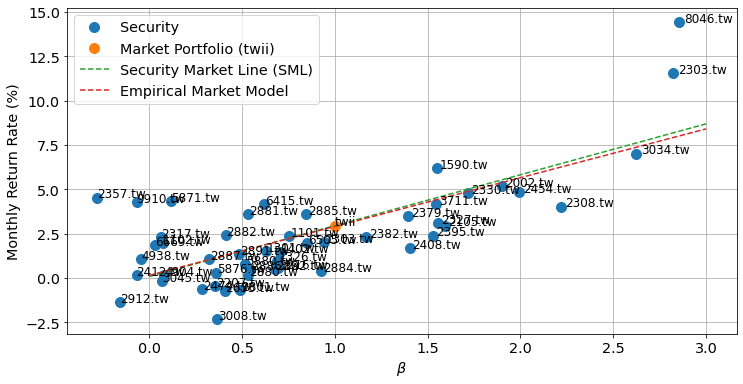

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(betas, returns, "o", ms = 10)
for i in range(len(ticks)):
    plt.text(betas[i] * 1.01, returns[i], ticks[i], fontsize = 12)

rm = (np.mean(x) + rf) * 100
plt.plot(1, rm, "o", ms = 10)
plt.text(1, rm, "twii", fontsize = 12)

x_range = np.linspace(0, round(max(betas)), 100)
y_range = (rm - rf * 100) * x_range + rf * 100
plt.plot(x_range, y_range, "--")

y_range = results_.params[1] * x_range + results_.params[0]
plt.plot(x_range, y_range, "--")
plt.legend(["Security", "Market Portfolio (twii)", "Security Market Line (SML)", "Empirical Market Model"])
plt.xlabel("$\\beta$")
plt.ylabel("Monthly Return Rate (%)")
plt.grid(True)